# API PYTHON PROJECT

In [2]:
#pip install spotipy

In [16]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
import requests
import matplotlib.pyplot as plt
import pprint
import datetime

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [4]:
spotipy.Spotify()

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


# Crea una instancia de SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [11]:
artist_id = '10AzTrYMPVVmpKoBP5bX9W'
artist_profile = sp.artist(artist_id)
pprint.pp(artist_profile) #con esta forma de imprimir lo veo mucho mejor

{'external_urls': {'spotify': 'https://open.spotify.com/artist/10AzTrYMPVVmpKoBP5bX9W'},
 'followers': {'href': None, 'total': 396078},
 'genres': ['argentine reggae',
            'argentine rock',
            'post-punk argentina',
            'rock nacional',
            'ska argentino'],
 'href': 'https://api.spotify.com/v1/artists/10AzTrYMPVVmpKoBP5bX9W',
 'id': '10AzTrYMPVVmpKoBP5bX9W',
 'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b2733b5ad8b3f780523376b2f9b4',
             'height': 640,
             'width': 640},
            {'url': 'https://i.scdn.co/image/ab67616d00001e023b5ad8b3f780523376b2f9b4',
             'height': 300,
             'width': 300},
            {'url': 'https://i.scdn.co/image/ab67616d000048513b5ad8b3f780523376b2f9b4',
             'height': 64,
             'width': 64}],
 'name': 'Sumo',
 'popularity': 55,
 'type': 'artist',
 'uri': 'spotify:artist:10AzTrYMPVVmpKoBP5bX9W'}


In [13]:
artist_pop_tracks = sp.artist_top_tracks(artist_id)['tracks']
pprint.pp(artist_pop_tracks)

[{'album': {'album_type': 'album',
            'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/10AzTrYMPVVmpKoBP5bX9W'},
                         'href': 'https://api.spotify.com/v1/artists/10AzTrYMPVVmpKoBP5bX9W',
                         'id': '10AzTrYMPVVmpKoBP5bX9W',
                         'name': 'Sumo',
                         'type': 'artist',
                         'uri': 'spotify:artist:10AzTrYMPVVmpKoBP5bX9W'}],
            'available_markets': ['AR',
                                  'AU',
                                  'AT',
                                  'BE',
                                  'BO',
                                  'BR',
                                  'BG',
                                  'CA',
                                  'CL',
                                  'CO',
                                  'CR',
                                  'CY',
                                  'CZ',
                      

In [54]:
reduced_tracks = []
for track in artist_pop_tracks:
    new_tracks = {}
    for k,v in track.items() :
        if k == 'duration_ms' : 
            new_tracks['duration_min'] =str(datetime.timedelta(seconds=v/1000)).rsplit('.', 1)[0]
        elif k in ['name', 'popularity']:
            new_tracks[k] = v
    reduced_tracks.append(new_tracks)

pprint.pp(reduced_tracks)

[{'duration_min': '0:02:40', 'name': 'No Tan Distintos', 'popularity': 56},
 {'duration_min': '0:03:42', 'name': 'La Rubia Tarada', 'popularity': 54},
 {'duration_min': '0:03:17', 'name': 'Los Viejos Vinagres', 'popularity': 54},
 {'duration_min': '0:04:46',
  'name': 'Mejor No Hablar de Ciertas Cosas',
  'popularity': 51},
 {'duration_min': '0:02:14', 'name': 'El Ojo Blindado', 'popularity': 50},
 {'duration_min': '0:03:34',
  'name': 'Estallando Desde el Océano',
  'popularity': 48},
 {'duration_min': '0:02:16', 'name': 'Lo Quiero Ya', 'popularity': 47},
 {'duration_min': '0:05:41', 'name': 'Heroína', 'popularity': 46},
 {'duration_min': '0:03:44', 'name': 'Regtest', 'popularity': 46},
 {'duration_min': '0:03:30', 'name': 'Crua Chan', 'popularity': 46}]


In [58]:
popular_tracks = pd.DataFrame(reduced_tracks)
popular_tracks.sort_values(['popularity'],ascending=False).head(3)
    

,duration_min,name,popularity
0,0:02:40,No Tan Distintos,56
1,0:03:42,La Rubia Tarada,54
2,0:03:17,Los Viejos Vinagres,54


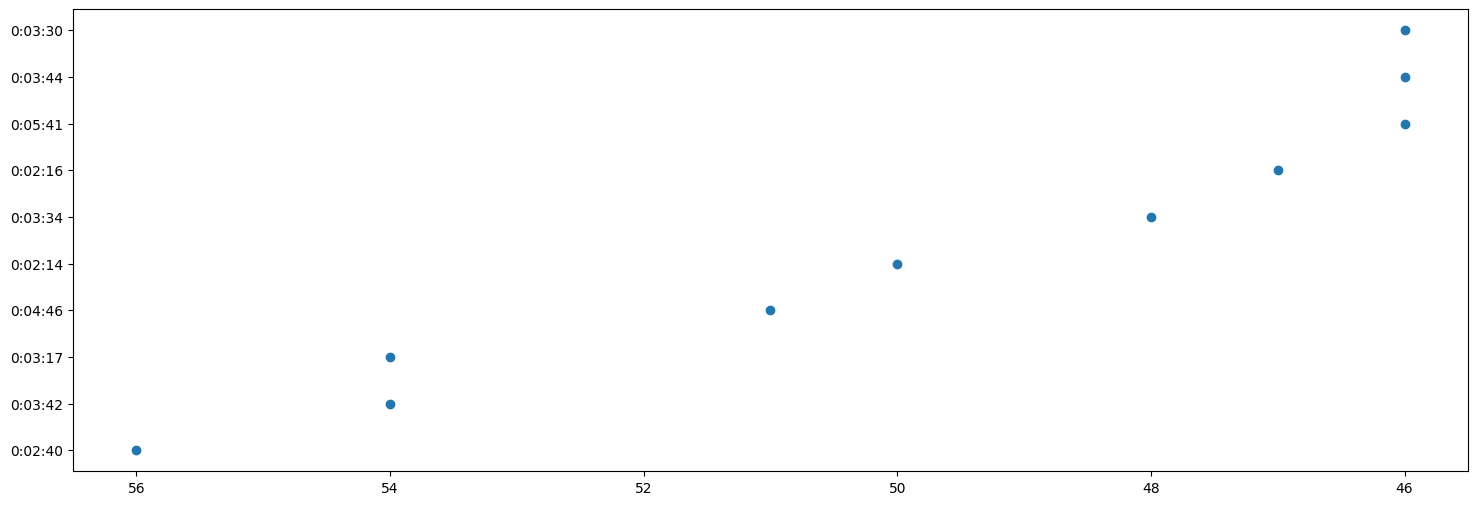

In [59]:
plt.figure(figsize=(18,6))
plt.scatter(popular_tracks['popularity'].sort_values(ascending=False),popular_tracks['duration_min'])
plt.gca().invert_xaxis()
plt.show()

It seems to be a vague inverse relationship between song popularity (x-axis) and duration (y-axis), where shorter songs tend to be more popular. However, with only a few data points, the trend isn't very strong or clear, and it could easily be a coincidence. The relationship looks weak, so any correlation might be forced or not statistically significant without further analysis.